In [9]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline
from sklearn.cluster import KMeans

(120, 213, 3)
(25560, 3)


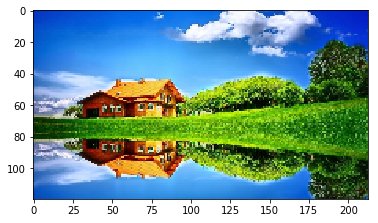

In [10]:
im = cv2.imread('./img.jpg')
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
r,c=im.shape[:2]
out_r= 120
im=cv2.resize(im,(int(out_r*float(c)/r), out_r))
print (im.shape)
pixel=im.reshape(-1,3)
print (pixel.shape)
plt.imshow(im)

In [11]:
km=KMeans(n_clusters=8)
km.fit(pixel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
colors=np.asarray(km.cluster_centers_,dtype='uint8')

In [14]:
per=np.asarray(np.unique(km.labels_,return_counts=True)[1],dtype='float32')
per=per/pixel.shape[0]
print (per)

[ 0.10641628  0.10352112  0.0379108   0.21952268  0.20551643  0.11995305
  0.14460094  0.06255869]


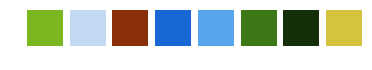

In [15]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch=np.ones((20,20,3))
    patch[:,:,:]=255- colors[ix]
    plt.subplot(1,colors.shape[0],ix+1)
    plt.axis('off')
    plt.imshow(patch)

In [16]:
dom=[[per[ix],colors[ix]] for ix in range(colors.shape[0])]
Dom=sorted(dom, key =lambda z:z[0],reverse=True)
print (dom)
print (Dom)

[[0.10641628, array([122, 182,  29], dtype=uint8)], [0.10352112, array([195, 216, 241], dtype=uint8)], [0.037910797, array([136,  46,  10], dtype=uint8)], [0.21952268, array([ 24, 102, 211], dtype=uint8)], [0.20551643, array([ 88, 164, 235], dtype=uint8)], [0.11995305, array([ 59, 119,  20], dtype=uint8)], [0.14460094, array([20, 46,  9], dtype=uint8)], [0.062558688, array([212, 194,  60], dtype=uint8)]]
[[0.21952268, array([ 24, 102, 211], dtype=uint8)], [0.20551643, array([ 88, 164, 235], dtype=uint8)], [0.14460094, array([20, 46,  9], dtype=uint8)], [0.11995305, array([ 59, 119,  20], dtype=uint8)], [0.10641628, array([122, 182,  29], dtype=uint8)], [0.10352112, array([195, 216, 241], dtype=uint8)], [0.062558688, array([212, 194,  60], dtype=uint8)], [0.037910797, array([136,  46,  10], dtype=uint8)]]


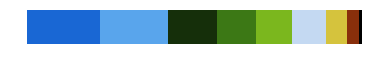

In [17]:
plt.figure(0)

patch= np.zeros((50,500,3))
start=0
for ix in range(km.n_clusters):
    width = int(Dom[ix][0] * patch.shape[1])
    end = start + width
    patch[:,start:end,:]=255-Dom[ix][1]
    start=end
plt.axis('off')
plt.imshow(patch)
